In [1]:
! unzip brain_tumor_dataset.zip


Archive:  brain_tumor_dataset.zip
   creating: brain_tumor_dataset/test/
  inflating: brain_tumor_dataset/test/ (2).JPG  
 extracting: brain_tumor_dataset/test/ (3).jpg  
  inflating: brain_tumor_dataset/test/ (4).jpg  
  inflating: brain_tumor_dataset/test/ (5).jpg  
  inflating: brain_tumor_dataset/test/ (6).jpg  
  inflating: brain_tumor_dataset/test/ (7).jpg  
  inflating: brain_tumor_dataset/test/ (8).jpg  
  inflating: brain_tumor_dataset/test/.JPG  
   creating: brain_tumor_dataset/train/
   creating: brain_tumor_dataset/train/no/
  inflating: brain_tumor_dataset/train/no/10 no.jpg  
  inflating: brain_tumor_dataset/train/no/11 no.jpg  
  inflating: brain_tumor_dataset/train/no/12 no.jpg  
  inflating: brain_tumor_dataset/train/no/13 no.jpg  
  inflating: brain_tumor_dataset/train/no/14 no.jpg  
  inflating: brain_tumor_dataset/train/no/15 no.jpg  
  inflating: brain_tumor_dataset/train/no/17 no.jpg  
  inflating: brain_tumor_dataset/train/no/18 no.jpg  
  inflating: brain_tumor

In [28]:
! unzip valid.zip

Archive:  valid.zip
   creating: valid/no/
  inflating: valid/no/1 no.jpeg      
  inflating: valid/no/2 no.jpeg      
  inflating: valid/no/3 no.jpg       
  inflating: valid/no/4 no.jpg       
  inflating: valid/no/5 no.jpg       
  inflating: valid/no/no 3.jpg       
 extracting: valid/no/no 4.jpg       
  inflating: valid/no/no 5.jpeg      
  inflating: valid/no/no 6.jpg       
  inflating: valid/no/no 7.jpeg      
   creating: valid/yes/
  inflating: valid/yes/Y1.jpg        
  inflating: valid/yes/Y162.jpg      
  inflating: valid/yes/Y163.JPG      
  inflating: valid/yes/Y164.JPG      
  inflating: valid/yes/Y165.JPG      
  inflating: valid/yes/Y166.JPG      
  inflating: valid/yes/Y2.jpg        
  inflating: valid/yes/Y3.jpg        
  inflating: valid/yes/Y4.jpg        
  inflating: valid/yes/Y6.jpg        


In [2]:
import os, shutil

In [3]:
train_images= '/content/brain_tumor_dataset/train'
print('Total no of folder containing in training the model are:', len(os.listdir(train_images)))

Total no of folder containing in training the model are: 2


In [4]:
##we have two folder containing images for no tumor and yes tumor
no_tumor='/content/brain_tumor_dataset/train/no'
print('total no of images for training about no tumor:', len(os.listdir(no_tumor)))

total no of images for training about no tumor: 84


In [5]:
yes_tumor='/content/brain_tumor_dataset/train/yes'
print('total no. of images for training about the patience having tumor: ', len(os.listdir(yes_tumor)))

total no. of images for training about the patience having tumor:  141


In [6]:
validation_images='/content/brain_tumor_dataset/valid'
print('total no. of images for validation of our model are:', len(os.listdir(validation_images)))

total no. of images for validation of our model are: 20


In [9]:
test_images='/content/brain_tumor_dataset/test'
print('Finally we have total no. of images for our test are:', len(os.listdir(test_images)))

Finally we have total no. of images for our test are: 8


In [10]:
# This Dataset is much smaller let's see how we can get good accuracy with our model 
#first we will use dataaugmentation technique to tackle this problem

In [12]:
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [21]:
import numpy as np
import pandas as pd
import cv2
img=cv2.imread('/content/brain_tumor_dataset/train/no/15 no.jpg')
img.shape

(217, 232, 3)

In [23]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/brain_tumor_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 225 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [34]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 50

In [35]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch_training,
      epochs=num_epochs,
      validation_data=validation_generator,
      validation_steps=steps_per_epoch_validation)

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 0.6210 - acc: 0.6489 - val_loss: 0.6305 - val_acc: 0.6500
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 0.6118 - acc: 0.6533 - val_loss: 0.6358 - val_acc: 0.5000
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 0.6117 - acc: 0.6756 - val_loss: 0.6471 - val_acc: 0.5000
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 0.5955 - acc: 0.6844 - val_loss: 0.6335 - val_acc: 0.5000
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 0.5898 - acc: 0.6889 - val_loss: 0.6671 - val_acc: 0.5000
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.6420 - acc: 0.6711 - val_loss: 0.6603 - val_acc: 0.5000
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 0.6398 - acc: 0.6444 - val_loss: 0.6472 - val_acc: 0.5000
Epoch 8/50
8/8 [==============================] - 8s 1s/step - loss: 0.5942 - acc: 0.6933 - val_loss: 0.5107 - 

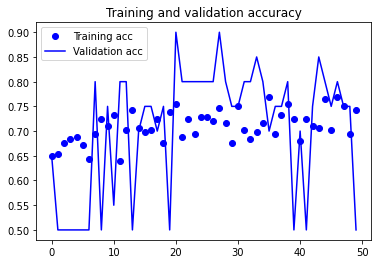

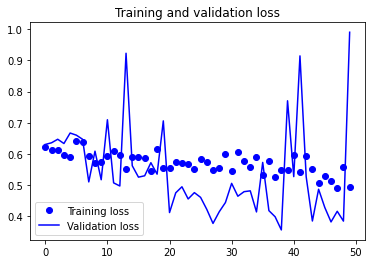

In [37]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [43]:
! unzip test.zip

Archive:  test.zip
   creating: test/no/
 extracting: test/no/no (2).jpg      
  inflating: test/no/no (3).JPG      
  inflating: test/no/no.jpg          
   creating: test/yes/
  inflating: test/yes/yes (2).jpg    
  inflating: test/yes/yes (3).JPG    
  inflating: test/yes/yes (4).jpg    
  inflating: test/yes/yes (5).jpg    
  inflating: test/yes/yes.jpg        


In [52]:
test_generator = train_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')
steps_per_epoch_test=len(test_generator)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=steps_per_epoch_test)
print('test acc:', test_acc)


Found 8 images belonging to 2 classes.
test acc: 0.625


In [53]:
model.save('Tumor detection from scratched with augmented technique.h5')

**we build a model from scratched to classify MRI images of brain tumor and it gives us accuracy of 62. something which is not we want **

**now we see another technique to increase our model accuracy, first we load a pretrained model and we extract features of our images through their convolutional base and apply those features on a new model**

In [54]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [56]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
train_images='/content/brain_tumor_dataset/train'
valid_images='/content/valid'
test_images='/content/test'
print('training images:', len(os.listdir(train_images)))
print('valid images:', len(os.listdir(valid_images)))
print('test images:', len(os.listdir(test_images)))

training images: 2
valid images: 2
test images: 2


In [59]:
train_images_no='/content/brain_tumor_dataset/train/no'
train_images_yes='/content/brain_tumor_dataset/train/yes'
valid_images_no='/content/valid/no'
valid_images_yes='/content/valid/yes'
test_images_no='/content/test/no'
test_images_yes='/content/test/yes'

In [61]:
print('training images no:', len(os.listdir(train_images_no)), 'training images yes:', len(os.listdir(train_images_yes)))
print('validation images no:', len(os.listdir(valid_images_no)), 'validation images yes:', len(os.listdir(valid_images_yes)))
print('test images no:', len(os.listdir(test_images_no)), 'test images yes:', len(os.listdir(test_images_yes)))

training images no: 84 training images yes: 141
validation images no: 10 validation images yes: 10
test images no: 3 test images yes: 5


In [64]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/base_dir'

train_dir = '/content/brain_tumor_dataset/train'
validation_dir ='/content/valid'
test_dir = '/content/test'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 225)
validation_features, validation_labels = extract_features(validation_dir, 20)
test_features, test_labels = extract_features(test_dir, 8)



Found 225 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 8 images belonging to 2 classes.




The extracted features are currently of shape (samples, 4, 4, 512). We will feed them to a densely-connected classifier, so first we must flatten them to (samples, 8192):


In [73]:
train_features.shape



(225, 4, 4, 512)

In [71]:
validation_features.shape

(20, 4, 4, 512)

In [72]:
test_features.shape

(8, 4, 4, 512)

In [74]:
train_features = np.reshape(train_features, (225, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (20, 4 * 4 * 512))
test_features = np.reshape(test_features, (8, 4 * 4 * 512))



In [75]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))



Epoch 1/30
12/12 [==============================] - 0s 23ms/step - loss: 0.6980 - acc: 0.5733 - val_loss: 0.6294 - val_acc: 0.6000
Epoch 2/30
12/12 [==============================] - 0s 13ms/step - loss: 0.6067 - acc: 0.6489 - val_loss: 0.5512 - val_acc: 0.8500
Epoch 3/30
12/12 [==============================] - 0s 13ms/step - loss: 0.5749 - acc: 0.6978 - val_loss: 0.5228 - val_acc: 0.9000
Epoch 4/30
12/12 [==============================] - 0s 14ms/step - loss: 0.5269 - acc: 0.7644 - val_loss: 0.5303 - val_acc: 0.7500
Epoch 5/30
12/12 [==============================] - 0s 14ms/step - loss: 0.4276 - acc: 0.8133 - val_loss: 0.4772 - val_acc: 0.8500
Epoch 6/30
12/12 [==============================] - 0s 14ms/step - loss: 0.4602 - acc: 0.7867 - val_loss: 0.4695 - val_acc: 0.9000
Epoch 7/30
12/12 [==============================] - 0s 15ms/step - loss: 0.4267 - acc: 0.8267 - val_loss: 0.4705 - val_acc: 0.9000
Epoch 8/30
12/12 [==============================] - 0s 14ms/step - loss: 0.4187 - a

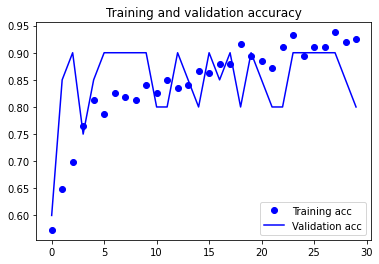

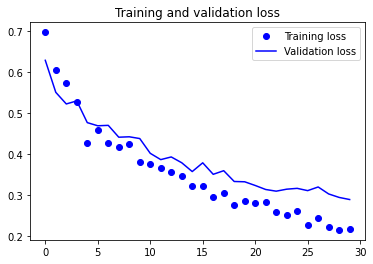

In [76]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [78]:
test_loss, test_acc = model.evaluate(test_features,test_labels, steps=3)
print('test acc:', test_acc)

3/3 [==============================] - 0s 3ms/step - loss: 0.3185 - acc: 0.7500
test acc: 0.75


**this technique gives us a lot more good accuracy then previous one, what we did? we extract features of of images using pretrained vgg16 model and save it in the form of arrays in the disk and pass these features to a new model. we did not used augmentation technique here.

In [79]:
model.save('Tumor detection using extracting features.h5')

**now we will use a pretrained model with our densely connected layer to classify images**

In [2]:
! unzip brain_tumor_dataset.zip

Archive:  brain_tumor_dataset.zip
   creating: brain_tumor_dataset/test/
  inflating: brain_tumor_dataset/test/ (2).JPG  
 extracting: brain_tumor_dataset/test/ (3).jpg  
  inflating: brain_tumor_dataset/test/ (4).jpg  
  inflating: brain_tumor_dataset/test/ (5).jpg  
  inflating: brain_tumor_dataset/test/ (6).jpg  
  inflating: brain_tumor_dataset/test/ (7).jpg  
  inflating: brain_tumor_dataset/test/ (8).jpg  
  inflating: brain_tumor_dataset/test/.JPG  
   creating: brain_tumor_dataset/train/
   creating: brain_tumor_dataset/train/no/
  inflating: brain_tumor_dataset/train/no/10 no.jpg  
  inflating: brain_tumor_dataset/train/no/11 no.jpg  
  inflating: brain_tumor_dataset/train/no/12 no.jpg  
  inflating: brain_tumor_dataset/train/no/13 no.jpg  
  inflating: brain_tumor_dataset/train/no/14 no.jpg  
  inflating: brain_tumor_dataset/train/no/15 no.jpg  
  inflating: brain_tumor_dataset/train/no/17 no.jpg  
  inflating: brain_tumor_dataset/train/no/18 no.jpg  
  inflating: brain_tumor

In [3]:
! unzip test.zip

Archive:  test.zip
   creating: test/no/
 extracting: test/no/no (2).jpg      
  inflating: test/no/no (3).JPG      
  inflating: test/no/no.jpg          
   creating: test/yes/
  inflating: test/yes/yes (2).jpg    
  inflating: test/yes/yes (3).JPG    
  inflating: test/yes/yes (4).jpg    
  inflating: test/yes/yes (5).jpg    
  inflating: test/yes/yes.jpg        


In [4]:
! unzip valid.zip

Archive:  valid.zip
   creating: valid/no/
  inflating: valid/no/1 no.jpeg      
  inflating: valid/no/2 no.jpeg      
  inflating: valid/no/3 no.jpg       
  inflating: valid/no/4 no.jpg       
  inflating: valid/no/5 no.jpg       
  inflating: valid/no/no 3.jpg       
 extracting: valid/no/no 4.jpg       
  inflating: valid/no/no 5.jpeg      
  inflating: valid/no/no 6.jpg       
  inflating: valid/no/no 7.jpeg      
   creating: valid/yes/
  inflating: valid/yes/Y1.jpg        
  inflating: valid/yes/Y162.jpg      
  inflating: valid/yes/Y163.JPG      
  inflating: valid/yes/Y164.JPG      
  inflating: valid/yes/Y165.JPG      
  inflating: valid/yes/Y166.JPG      
  inflating: valid/yes/Y2.jpg        
  inflating: valid/yes/Y3.jpg        
  inflating: valid/yes/Y4.jpg        
  inflating: valid/yes/Y6.jpg        


In [5]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))



This is the number of trainable weights before freezing the conv base: 30


In [9]:
conv_base.trainable = False

In [10]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/brain_tumor_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/valid',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

steps_per_epoch_training=len(train_generator)
steps_per_epoch_validation= len(validation_generator)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch_training,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=steps_per_epoch_validation,
      verbose=2)

Found 225 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
12/12 - 2s - loss: 0.7246 - acc: 0.5244 - val_loss: 0.7103 - val_acc: 0.5000
Epoch 2/30
12/12 - 2s - loss: 0.6459 - acc: 0.6400 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 3/30
12/12 - 2s - loss: 0.6139 - acc: 0.6622 - val_loss: 0.6413 - val_acc: 0.5500
Epoch 4/30
12/12 - 2s - loss: 0.5802 - acc: 0.6844 - val_loss: 0.5901 - val_acc: 0.7000
Epoch 5/30
12/12 - 2s - loss: 0.5617 - acc: 0.7200 - val_loss: 0.5537 - val_acc: 0.8000
Epoch 6/30
12/12 - 2s - loss: 0.5576 - acc: 0.7067 - val_loss: 0.5425 - val_acc: 0.7000
Epoch 7/30
12/12 - 2s - loss: 0.5386 - acc: 0.7289 - val_loss: 0.5197 - val_acc: 0.8000
Epoch 8/30
12/12 - 2s - loss: 0.5500 - acc: 0.7022 - val_loss: 0.5478 - val_acc: 0.6500
Epoch 9/30
12/12 - 2s - loss: 0.5170 - acc: 0.7156 - val_loss: 0.4874 - val_acc: 0.8000
Epoch 10/30
12/12 - 2s - loss: 0.4983 - acc: 0.7644

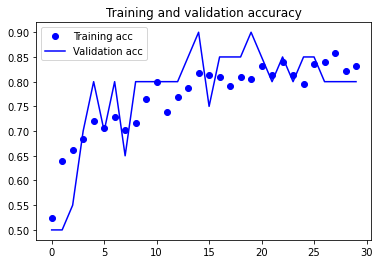

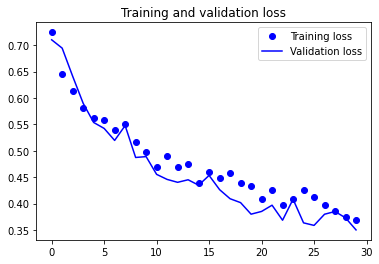

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [15]:
test_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')
steps_per_epoch_test=len(test_generator)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=steps_per_epoch_test)
print('test acc:', test_acc)

Found 8 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.875


In [16]:
model.save("Tumor detection using pretrained vgg16.h5")

**We got the accuracy of 87.5% using a pretrained model Vgg16 , next we will fine tune this model to see is their any scope to increase the performance of this medel**

In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

we will freeze all the convolutional block to block4 and fine fine tune only block5 to extract more imp features from image and add lastly after flattening we will add our densely connected classifier to classify b/w Tumor or non Tumor image

In [18]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=steps_per_epoch_training,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=steps_per_epoch_validation,
      verbose=1)



Epoch 1/100
12/12 [==============================] - 2s 181ms/step - loss: 0.4288 - acc: 0.7733 - val_loss: 0.3671 - val_acc: 0.8000
Epoch 2/100
12/12 [==============================] - 2s 175ms/step - loss: 0.3274 - acc: 0.8667 - val_loss: 0.2755 - val_acc: 0.9000
Epoch 3/100
12/12 [==============================] - 2s 162ms/step - loss: 0.3233 - acc: 0.8533 - val_loss: 0.2988 - val_acc: 0.8000
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 0.3242 - acc: 0.8444 - val_loss: 0.2181 - val_acc: 0.9500
Epoch 5/100
12/12 [==============================] - 2s 166ms/step - loss: 0.2596 - acc: 0.8978 - val_loss: 0.2065 - val_acc: 0.9500
Epoch 6/100
12/12 [==============================] - 2s 160ms/step - loss: 0.3143 - acc: 0.8800 - val_loss: 0.6502 - val_acc: 0.7500
Epoch 7/100
12/12 [==============================] - 2s 162ms/step - loss: 0.3137 - acc: 0.8489 - val_loss: 0.3734 - val_acc: 0.8000
Epoch 8/100
12/12 [==============================] - 2s 164ms/step - 

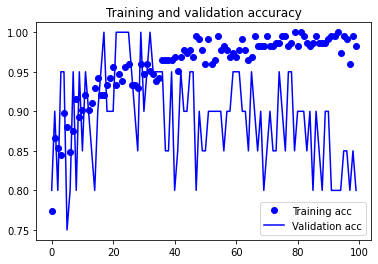

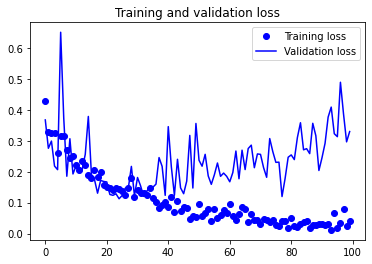

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [29]:
test_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')
steps_per_epoch_test=len(test_generator)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=steps_per_epoch_test)
print('test acc:', test_acc)

Found 17 images belonging to 2 classes.
test acc: 1.0


In [30]:
model.save("Fine Tuned model.h5")